# 종합실습 1 (중고차 가격 예측모델 개발 및 모델성능 향상)

#### 본 프로젝트는 DMAIC의 파이프라인 기준에 따라 작성한다.

## Define
- ### 과제 추진 배경
    - ##### 인도의 신차판매가 감소하면서, 중고차 성장이 지속적인 성장세를 보이고 있다. 이에 따라 주식회사 Pos_Cars 인도의 중고차 시장에 진출하려 한다.     
    - ##### 본 프로젝트를 통해 인도의 중고차 가격을 효과적으로 예측할 수 있는 핵심영향인자를 도출하여 가격예측모델을 개발함으로써 경쟁우위를 점하고자 한다.





### 데이터 분석 이전 가설 설정
- 가설 1 => 차량 브랜드는 중고차 가격에 영향을 미칠 것이다.

- 가설 2 => 친환경을 중시하는 인도의 문화적 특성에 따라, 하이브리드 혹은 전기차의 수요가 많을 것이며, 이러한 특성이 중고차 가격에 영향을 미칠 것이다.

- 가설 3 => 인도 차량 시장 점유율 순위가 중고차 가격에 영향을 미칠 것이다.

- 가설 4 => 금리 및 미국 소비자 물가지수가 중고차 전반적인 시세에 영향을 미칠 것이다.


## Measure

### 필요 패키지 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.api import qqplot, add_constant
from sklearn.tree import export_graphviz
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from statsmodels.api import qqplot
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib as mpl
import statsmodels.api as sm
import pydotplus
import scipy.stats

### 데이터 호출

In [211]:
df_raw = pd.read_csv("/Users/2circlejun/Desktop/시험용/2. Big Data 분석/Car.csv", encoding = 'euc-kr')
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


### 변수설명 및 분석

<font color=red>Price</font> : 중고차 가격(단위 천원)   (Target)

- Name : 자동차 브랜드와 모델
- Location : 자동차를 팔거나 구매할 수 있는 위치   
- Year : 모델의 년도 혹은 버전   
- Kilometers_Driven : 이전 소유주의 차량 주행거리   
- Fuel_Type : 자동차의 사용 연료 종류   
- Transmission : 자동차의 사용 변속기의 종류   
- Owner_type : 소유권이 직접 소유인지, 중고 소유인지 여부   
- Mileage : 자동차 회사가 제공하는 표준 주행거리   
- Engine : 엔진의 베기량   
- Power : 엔진의 최대 출력   
- Seats : 차의 좌석 수   
- New_price : 뉴모델의 가격   





- #### 데이터 shape 파악

In [4]:
df_raw.shape

(7253, 13)

총 7253개의 데이터와 13개의 컬럼으로 구성되어 있다.

- #### 데이터 기술통계량 

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [6]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

##### New_price에 대량의 결측치가 존재한다.

In [7]:
df_raw['Name'].value_counts()
len(df_raw['Name'].value_counts())

2041

##### 차종 및 브랜드의 고유값을 살펴보니 2041종으로 매우 많은 것을 확인할 수 있다.

## Step 1. Data 정제

### 결측값 처리

In [8]:
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


#### 단위를 처리해야할 것은 milage, engine, power, New_price 정도가 있는 것으로 보인다.

- ###  단위와 같이 포현되어 있는 수치형 변수 처리

In [9]:
# 수치형 변수의 단위 처리
df_raw['Mileage'] = df_raw['Mileage'].str.replace('kmpl', '')
df_raw['Engine'] = df_raw['Engine'].str.replace('CC', '')
df_raw['Power'] = df_raw['Power'].str.replace('bhp', '')

#### 신차 가격을 살펴보니 결측치가 6247개 존재한다. 만일 데이터가 어느 시점의 데이터인지 명시되어 있으면 라벨링 할 수 있지만, 현재로서는 결측치를 대체하기 보다는 삭제하는 것이 옳다 판단하여 삭제한다.

In [10]:
# New_Price 삭제
df_raw.drop(columns = ["New_Price"], inplace = True)

### - Data Type  확인 및 변경

In [11]:
df_raw.dtypes

Name                  object
Location              object
Price                float64
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

#### Fuel_type, Trinsmission, Owner_type은 범주형 변수이므로 타입을 지정한다.

In [12]:
# object data => category data type 으로 변경
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].astype('category')
df_raw['Transmission'] = df_raw['Transmission'].astype('category')
df_raw['Owner_Type'] = df_raw['Owner_Type'].astype('category')

#### 단위를 제거한 수치형 변수들은 실수로 타입을 지정한다.

In [13]:
# null값 0으로 처리
df_raw['Mileage'] = df_raw['Mileage'].str.replace('null', '0')
df_raw['Engine'] = df_raw['Engine'].str.replace('null', '0')
df_raw['Power'] = df_raw['Power'].str.replace('null', '0')

In [14]:
# object data => float64 로 변경
df_raw['Mileage'] = df_raw['Mileage'].astype('float64')
df_raw['Engine'] = df_raw['Engine'].astype('float64')
df_raw['Power'] = df_raw['Power'].astype('float64')

In [15]:
# data type 재확인
df_raw.dtypes

Name                   object
Location               object
Price                 float64
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
dtype: object

#### data type이 변경된 것을 확인할 수 있다.

In [16]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
dtype: int64

In [17]:
# data가 0인 data 를 nan값으로 처리한다
df_raw.loc[df_raw.Mileage == 0, 'Mileage'] = np.nan
df_raw.loc[df_raw.Engine == 0, 'Engine'] = np.nan
df_raw.loc[df_raw.Power == 0, 'Power'] = np.nan


#### 결측치 처리를 하기 전에 평균값으로 대체 했을 때 이상이 없는지 확인하기 위해 각각 boxplot을 통해 확인한다.

<AxesSubplot: >

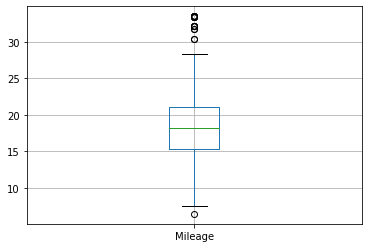

In [18]:
df_raw[['Mileage']].boxplot()

<AxesSubplot: >

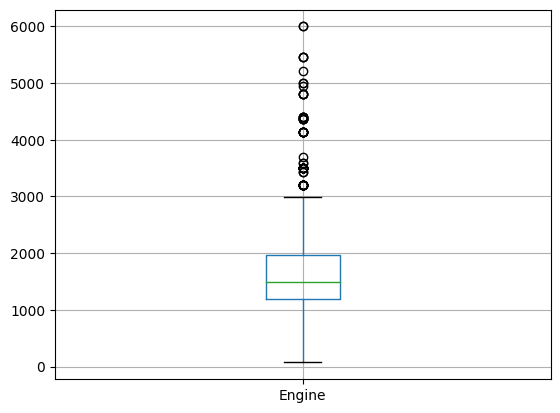

In [19]:
df_raw[['Engine']].boxplot()

<AxesSubplot: >

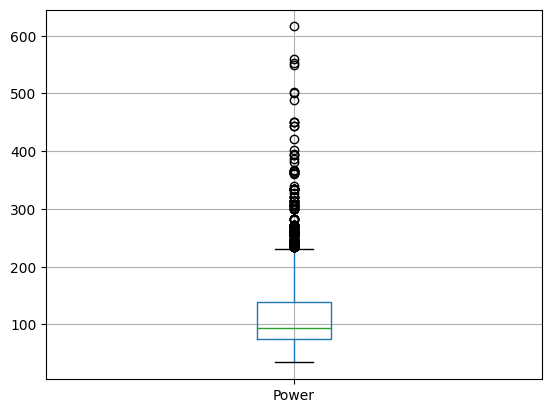

In [20]:
df_raw[['Power']].boxplot()

##### 위 세 변수 모두 특별한 이상치가 보이지 않기 때문에 평균값으로 대치한다.    


In [21]:
#시트수 확인
df_raw[df_raw['Seats'].isnull()]['Name'].unique()

array(['Honda City 1.5 GXI', 'Maruti Swift 1.3 VXi', 'Ford Figo Diesel',
       'Land Rover Range Rover 3.0 D', 'Honda City 1.3 DX',
       'Maruti Swift 1.3 ZXI',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Honda City 1.5 EXI', 'Maruti Swift 1.3 LXI',
       'Hyundai Santro LP zipPlus', 'Toyota Etios Liva V',
       'Maruti Swift 1.3 VXI ABS', 'Maruti Estilo LXI',
       'BMW 5 Series 520d Sedan', 'Hyundai Santro GLS II - Euro II',
       'Maruti Wagon R Vx', 'Ford Endeavour Hurricane LE',
       'Honda CR-V AT With Sun Roof', 'Fiat Punto 1.3 Emotion',
       'Hyundai Santro Xing XG', 'Honda Jazz Select Edition',
       'Fiat Punto 1.2 Dynamic', 'Fiat Punto 1.4 Emotion',
       'Skoda Laura 1.8 TSI Ambition',
       'Toyota Etios Liva Diesel TRD Sportivo',
       'Hyundai i20 new Sportz AT 1.4', 'Mahindra TUV 300 P4',
       'Honda Jazz 2020 Petrol'], dtype=object)

##### 시트수를 평균값으로 대치하는 것에 대해서는 반대의견이 있을 수도 있으나, 애초에 차량별 옵션에 따라 시트수는 상이하므로 판매하는 중고차의 세부 옵션이 제공되지 않은 상황에서는 알 방법이 없으니 평균값으로 대치한다.

In [22]:
# 결측치에 대해 평균값으로 대치
df_raw['Mileage'] = df_raw['Mileage'].fillna(df_raw['Mileage'].mean())
df_raw['Engine'] = df_raw['Engine'].fillna(df_raw['Engine'].mean())
df_raw['Power'] = df_raw['Power'].fillna(df_raw['Power'].mean())
df_raw['Seats'] = df_raw['Seats'].fillna(df_raw['Seats'].mean())

##### price는 모델명 키로수에 따라 상이하기 때문에 제거한다.

In [23]:
df_raw.dropna(inplace = True)

In [24]:
df_raw.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

#### 모든 결측치를 제거했다.

- ### 이상치 처리

In [25]:
df_raw.describe()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,6200.000000,6200.000000,6.200000e+03,6200.000000,6200.000000,6200.000000,6200.000000
mean,14912.514750,2013.434194,5.815738e+04,18.384720,1619.983814,113.300417,5.278508
std,17674.318464,3.271969,9.010627e+04,4.156986,599.744181,53.540989,0.805628
min,7.080000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,0.000000
25%,5365.360000,2012.000000,3.300000e+04,15.400000,1198.000000,77.750000,5.000000
50%,8814.520000,2014.000000,5.251450e+04,18.346527,1493.000000,98.600000,5.000000
75%,15869.972500,2016.000000,7.227750e+04,21.100000,1968.000000,138.030000,5.000000
max,245273.600000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000


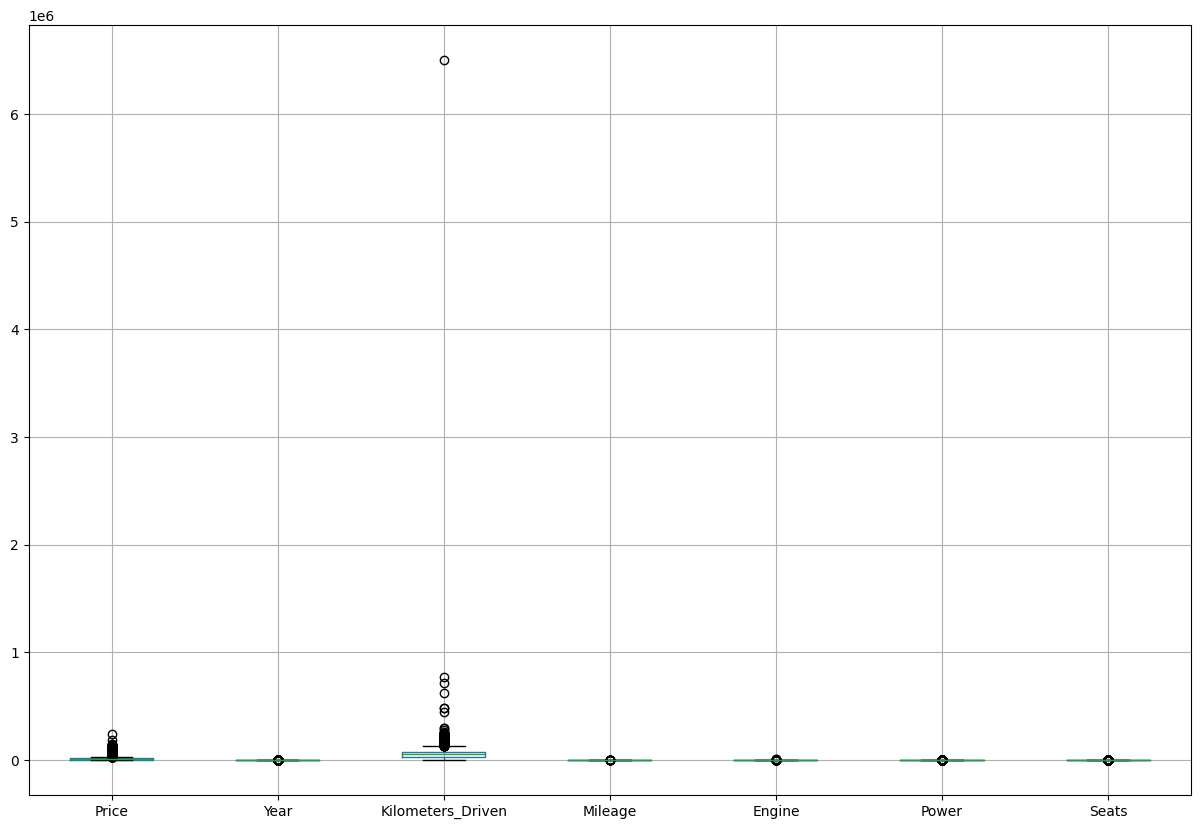

In [26]:
df_raw.boxplot(figsize = (15, 10))
plt.show()

주행거리중에 비정상적인 수치가 있기 때문에 확인 후 제거한다.

- 주행거리 77만 키로도 많기는 하지만 아예 불가능한 수치는 아니라고 판단된다. 하지만 650만 키로는 이상치로 보이므로 삭제한다.


#### 스케일 조정 후 다시 boxplot을 통한 확인

In [27]:
df_raw = df_raw[df_raw['Kilometers_Driven'] < 1000000]

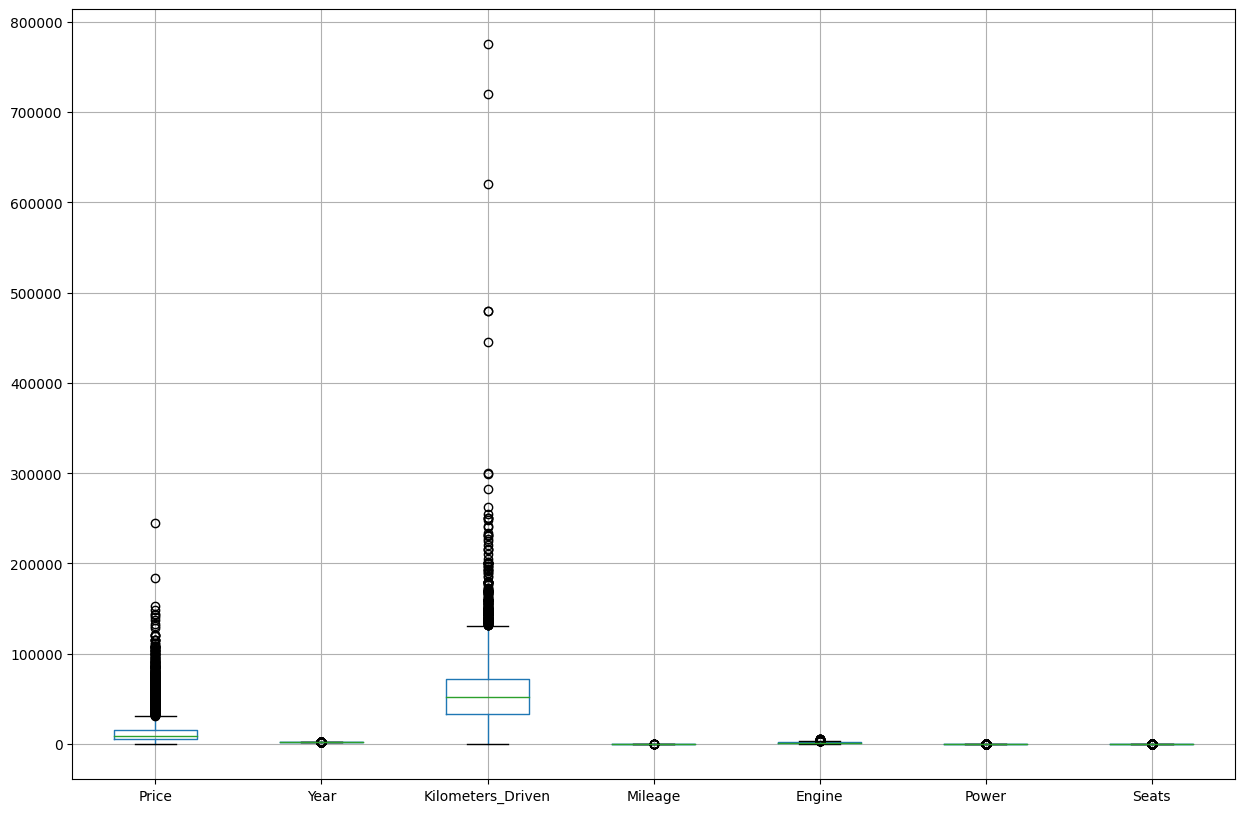

In [28]:
df_raw.boxplot(figsize = (15, 10))
plt.show()

price에 2 억원을 호가하는 차량이 있기 때문에 확인한다. 1 억원을 넘는 가격은 확인할 필요가 있기 때문에 확인한다.

In [29]:
df_raw[df_raw['Price'] > 100000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
282,Audi Q7 3.0 TDI Quattro Technology,Kochi,107859.07,2018,11287,Diesel,Automatic,First,12.07,2967.0,241.40,7.0
418,Mercedes-Benz GLC 43 AMG Coupe,Coimbatore,108824.83,2018,22397,Petrol,Automatic,First,11.50,2996.0,367.00,5.0
655,Jaguar XJ 2.0L Portfolio,Mumbai,114972.00,2017,10501,Petrol,Automatic,First,9.43,1999.0,237.40,5.0
1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,102708.32,2011,55000,Diesel,Automatic,First,10.20,4367.0,308.00,7.0
1194,Mercedes-Benz E-Class 2015-2017 E350 CDI Avant...,Mumbai,106540.72,2017,15000,Diesel,Automatic,First,13.00,2987.0,265.00,5.0
1336,Audi Q7 45 TDI Quattro Technology,Mumbai,102708.32,2016,20002,Diesel,Automatic,First,14.75,2967.0,245.00,7.0
1352,Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel,Bangalore,107307.20,2012,66538,Diesel,Automatic,First,10.20,4367.0,308.00,7.0
1505,Land Rover Range Rover Sport SE,Kochi,148804.43,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0
1583,Audi Q7 45 TDI Quattro Premium Plus,Kochi,111814.10,2019,6773,Diesel,Automatic,First,14.75,2967.0,245.00,7.0
1690,Mercedes-Benz GLE 350d,Coimbatore,108533.57,2018,40129,Diesel,Automatic,First,11.57,2987.0,254.79,5.0


- 해당 모델은 충분히 2억대를 호가하는 차량이며, 모델 성능을 좌우할 정도의 크기가 아니기 때문에 제거하지 않는다.

### 파생변수 생성

#### 차량 연식
- 2023년을 기준으로 연식을 계산하는 파생변수를 생성한다

In [30]:
df_raw['Age'] = 2023 - df_raw['Year']
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,8
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,12
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,10


In [31]:
df_raw['Age'].nunique()

22

#### 차량 브랜드

- 차량 브랜드 별로 유의미한 가격 차이가 있을 것으로 판단하여 브랜드 파생변수를 생성한다

In [32]:
df_raw['Brand'] = df_raw['Name'].apply(lambda x : x.split()[0])
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,13,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,8,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,12,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,10,Audi


In [33]:
df_raw['Brand'].nunique()

30

### 연속형 변수 분포 확인


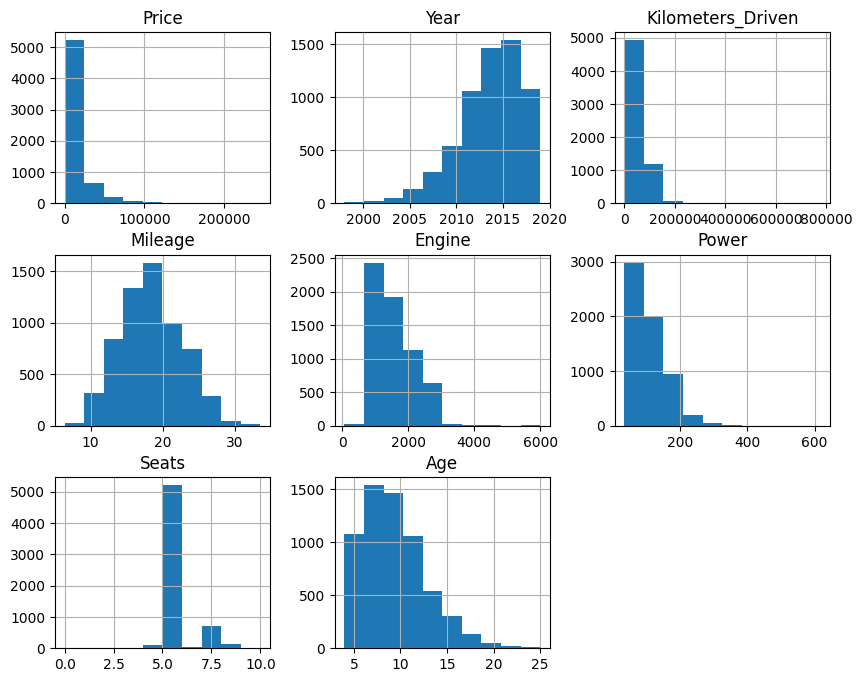

In [34]:
df_raw.hist(figsize = (10, 8))
plt.show()

- price, power, engine, Age 모두 좌편향 되어 있다.   
- Year은 우측으로 정규분포되어 있다.
- 시트수는 이산형 변수이므로 bar chart와 같이 5개와 7개 부분으로 편향되어 있다.

In [35]:
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,13,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,8,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,12,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,10,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,6,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,5,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,6,Maruti


#### 브랜드를 할당해 주었으니 Name컬럼을 삭제한다.

In [36]:
df_raw.drop(columns=['Name'], inplace = True)

In [37]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6199 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6199 non-null   object  
 1   Price              6199 non-null   float64 
 2   Year               6199 non-null   int64   
 3   Kilometers_Driven  6199 non-null   int64   
 4   Fuel_Type          6199 non-null   category
 5   Transmission       6199 non-null   category
 6   Owner_Type         6199 non-null   category
 7   Mileage            6199 non-null   float64 
 8   Engine             6199 non-null   float64 
 9   Power              6199 non-null   float64 
 10  Seats              6199 non-null   float64 
 11  Age                6199 non-null   int64   
 12  Brand              6199 non-null   object  
dtypes: category(3), float64(5), int64(3), object(2)
memory usage: 551.4+ KB


## 변수 별 분포 확인

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


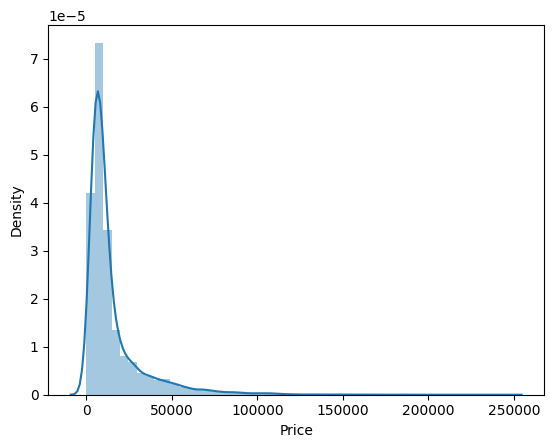

In [38]:
sns.distplot(df_raw['Price'])
plt.show()

- Price가 왼쪽으로 치우쳐 있다. 중고차 가격 특성상 초고가의 차량보다 중저가의 차량이 많기 때문에 좌측으로 쏠린 분포를 보인다.

#### 분포를 정규분포화 하기 위해 로그를 취해준다

<AxesSubplot: >

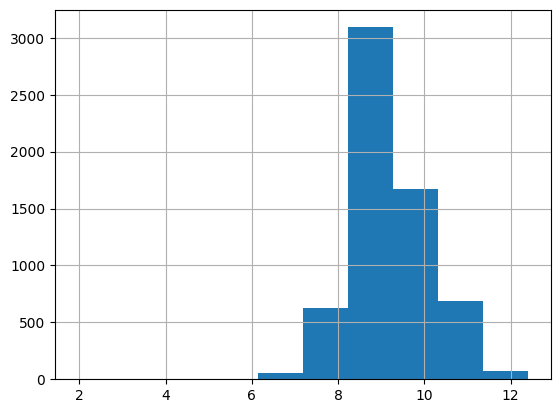

In [39]:
# log 변환 및 정규성 확인
df_raw['Price'] = np.log(df_raw['Price'])
df_raw['Price'].hist()

In [44]:
# data의 개수가 5천 개를 넘기 때문에 anderson을 사용하여 검정한다.
df_norm = scipy.stats.anderson(df_raw['Price'], dist='norm')
print(df_norm)

AndersonResult(statistic=42.702107866488404, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


- Anderson 검정 결과 정규성을 만족하는 것을 알 수 있다.

### 잔차들의 정규성을 검정한다.

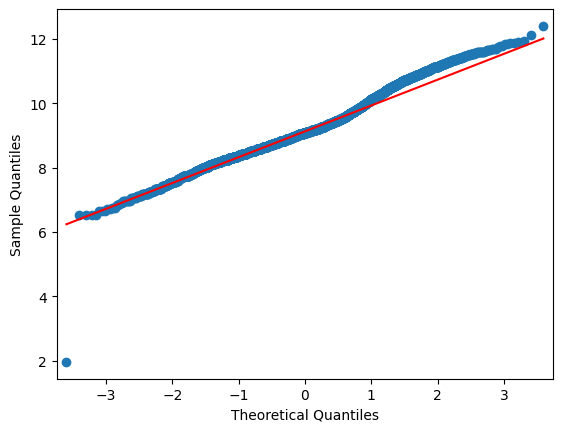

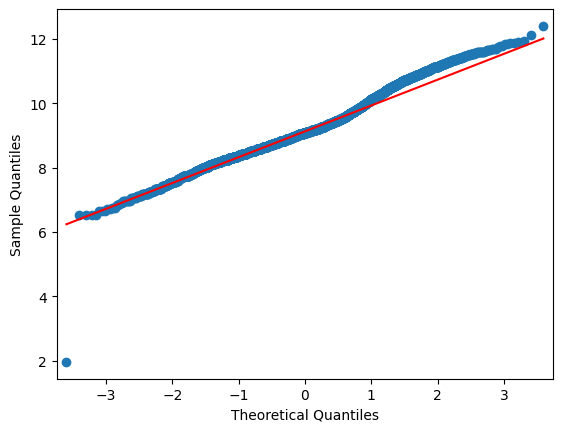

In [45]:
# 잔차 정규성 검정 
qqplot(df_raw['Price'], line = 'q')

- Price의 잔차는 정규성을 만족한다.

### Year 분포

<AxesSubplot: >

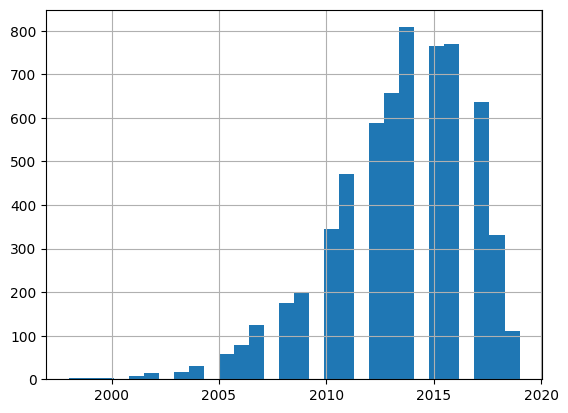

In [46]:
df_raw['Year'].hist(bins=30)

- 2015년도 기준으로 분포가 몰려있는 것을 볼 수 있다.

### Kilometers_Driven 분포

array([[<AxesSubplot: title={'center': 'Kilometers_Driven'}>]],
      dtype=object)

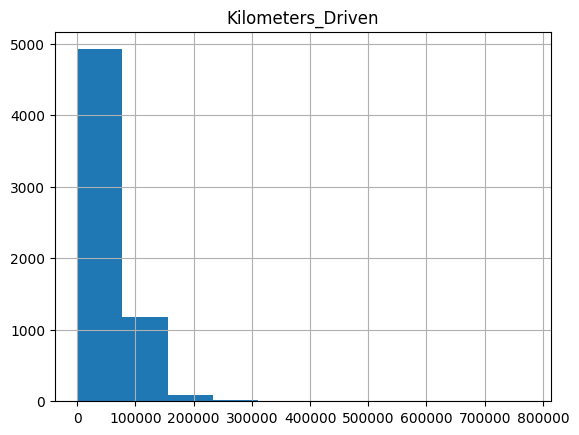

In [48]:
df_raw.hist('Kilometers_Driven')

<AxesSubplot: xlabel='Kilometers_Driven', ylabel='Count'>

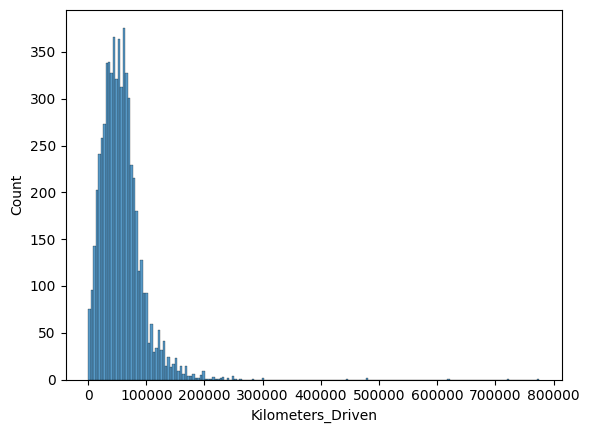

In [49]:
sns.histplot(df_raw, x = "Kilometers_Driven")

<AxesSubplot: xlabel='Mileage', ylabel='Count'>

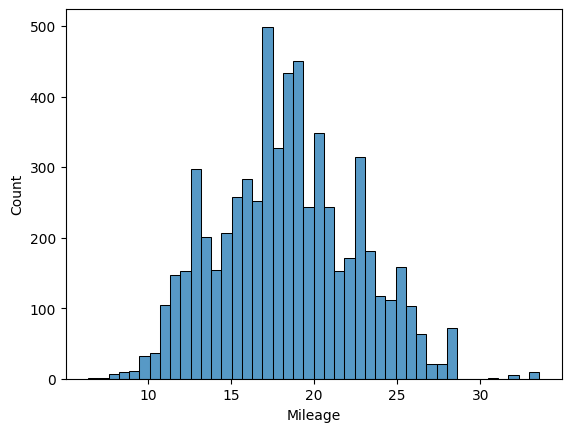

In [50]:
# Mileage 분포 확인
sns.histplot(df_raw, x = "Mileage")

<AxesSubplot: xlabel='Engine', ylabel='Count'>

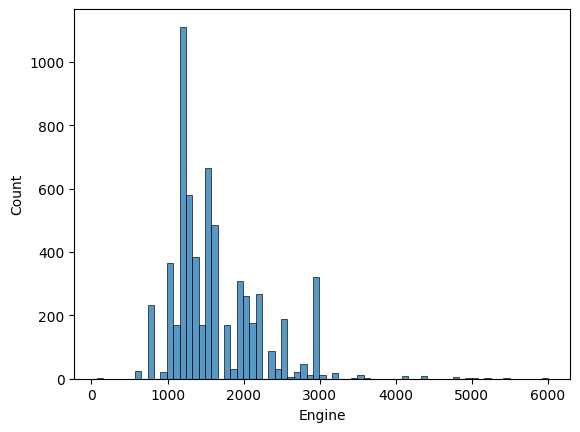

In [51]:
# Engine 성능 분포 확인
sns.histplot(df_raw, x = "Engine")

<AxesSubplot: xlabel='Power', ylabel='Count'>

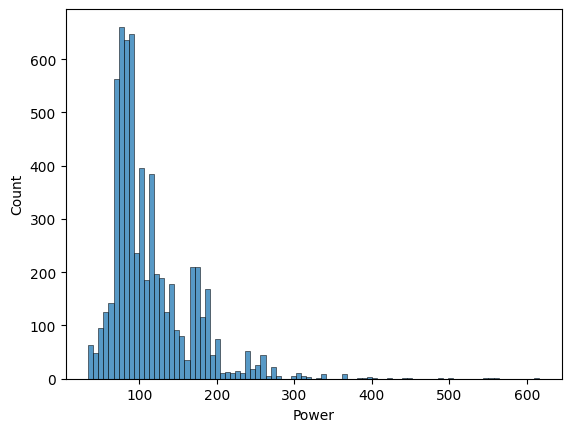

In [52]:
# Power 성능 분포 확인
sns.histplot(df_raw, x = "Power")

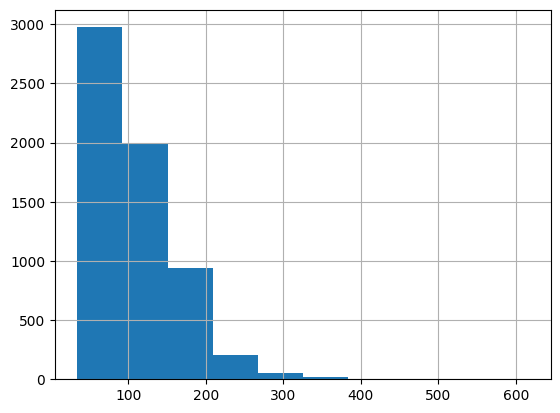

In [53]:
df_raw['Power'].hist()
plt.show()

<AxesSubplot: >

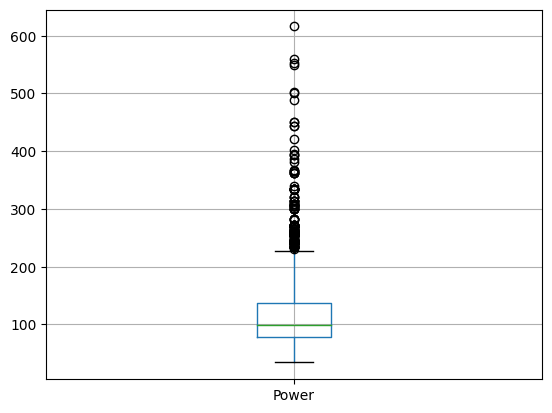

In [54]:
df_raw.boxplot('Power')

<AxesSubplot: >

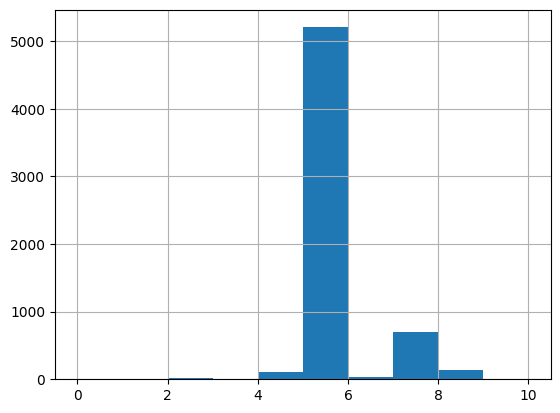

In [55]:
# Seats 분포 확인
df_raw['Seats'].hist()

<AxesSubplot: >

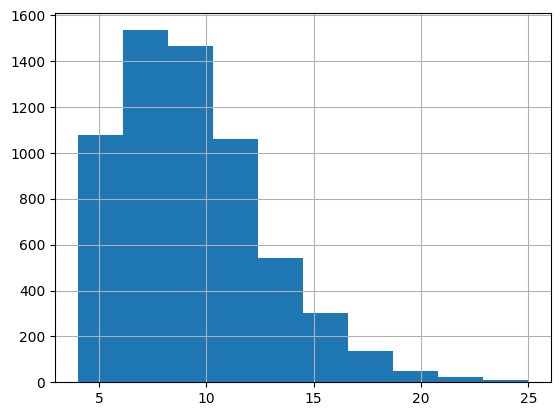

In [56]:
# Age 분포 확인
df_raw['Age'].hist()

In [57]:
df_raw["Brand"].value_counts()

Maruti           1254
Hyundai          1128
Honda             622
Toyota            423
Mercedes-Benz     325
Volkswagen        321
Ford              304
Mahindra          282
BMW               272
Audi              241
Tata              195
Skoda             182
Renault           151
Chevrolet         121
Nissan             95
Land               60
Jaguar             43
Mitsubishi         34
Fiat               31
Mini               29
Volvo              21
Jeep               19
Porsche            18
Datsun             17
ISUZU               3
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Name: Brand, dtype: int64

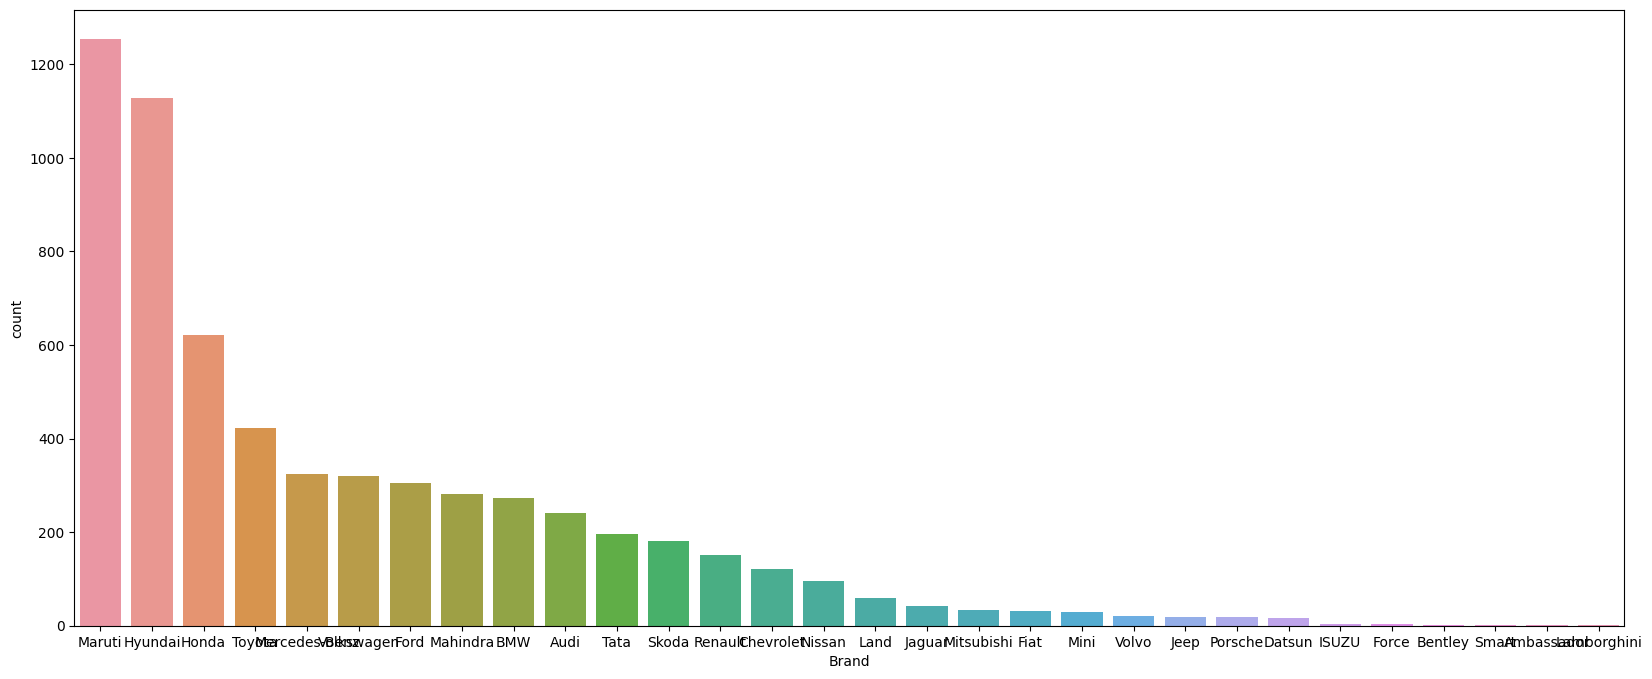

In [58]:
plt.figure(figsize = (20,8))
sns.countplot(x="Brand", data = df_raw, order = df_raw["Brand"].value_counts().index)
plt.show()

In [59]:
df_raw["Location"].value_counts()

Mumbai        817
Hyderabad     759
Kochi         676
Coimbatore    664
Pune          632
Delhi         572
Kolkata       552
Chennai       505
Jaipur        424
Bangalore     365
Ahmedabad     233
Name: Location, dtype: int64

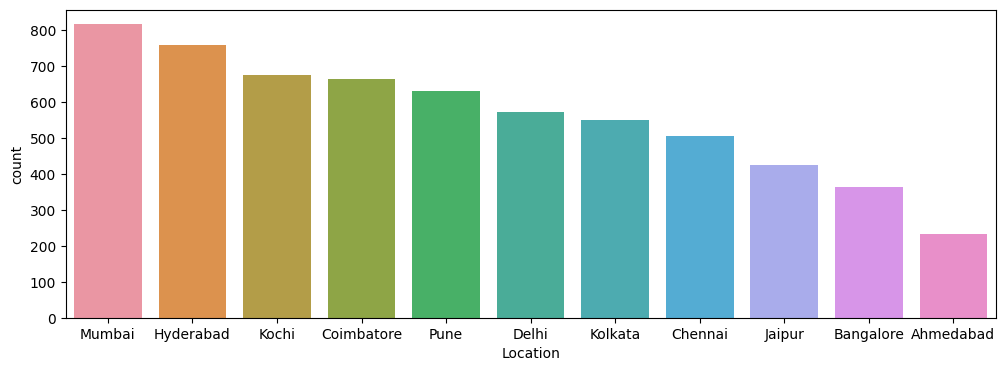

In [60]:
plt.figure(figsize = (12,4))
sns.countplot(x="Location", data = df_raw, order = df_raw["Location"].value_counts().index)
plt.show()

In [61]:
df_raw["Fuel_Type"].value_counts()

Diesel      3300
Petrol      2830
CNG           57
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

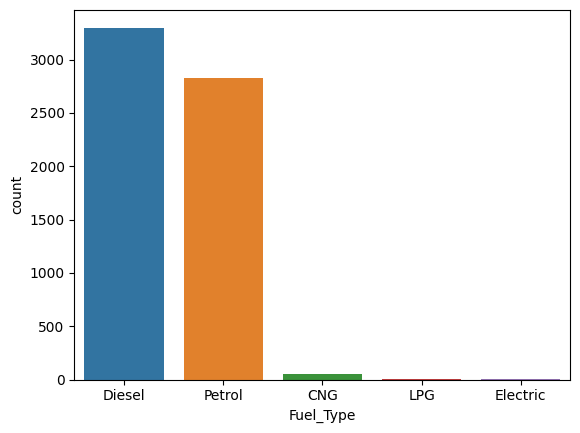

In [62]:
sns.countplot(x="Fuel_Type", data = df_raw, order = df_raw["Fuel_Type"].value_counts().index)
plt.show()

In [63]:
df_raw["Transmission"].value_counts()

Manual       4416
Automatic    1783
Name: Transmission, dtype: int64

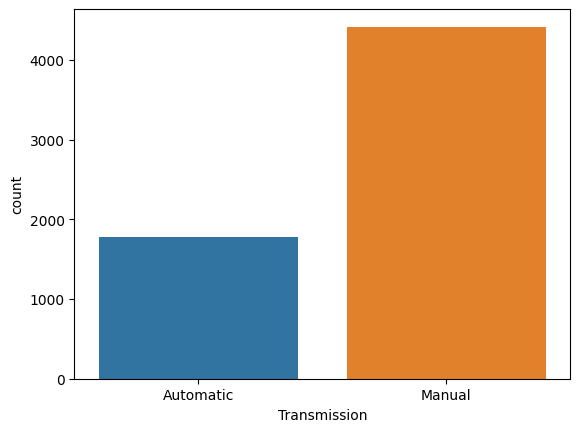

In [64]:
sns.countplot(x="Transmission", data = df_raw)
plt.show()

In [65]:
df_raw["Owner_Type"].value_counts()

First             5094
Second             983
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

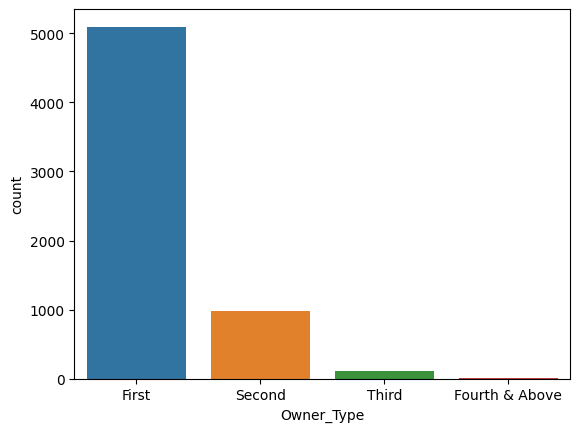

In [66]:
sns.countplot(x="Owner_Type", data = df_raw, order = df_raw["Owner_Type"].value_counts().index)
plt.show()

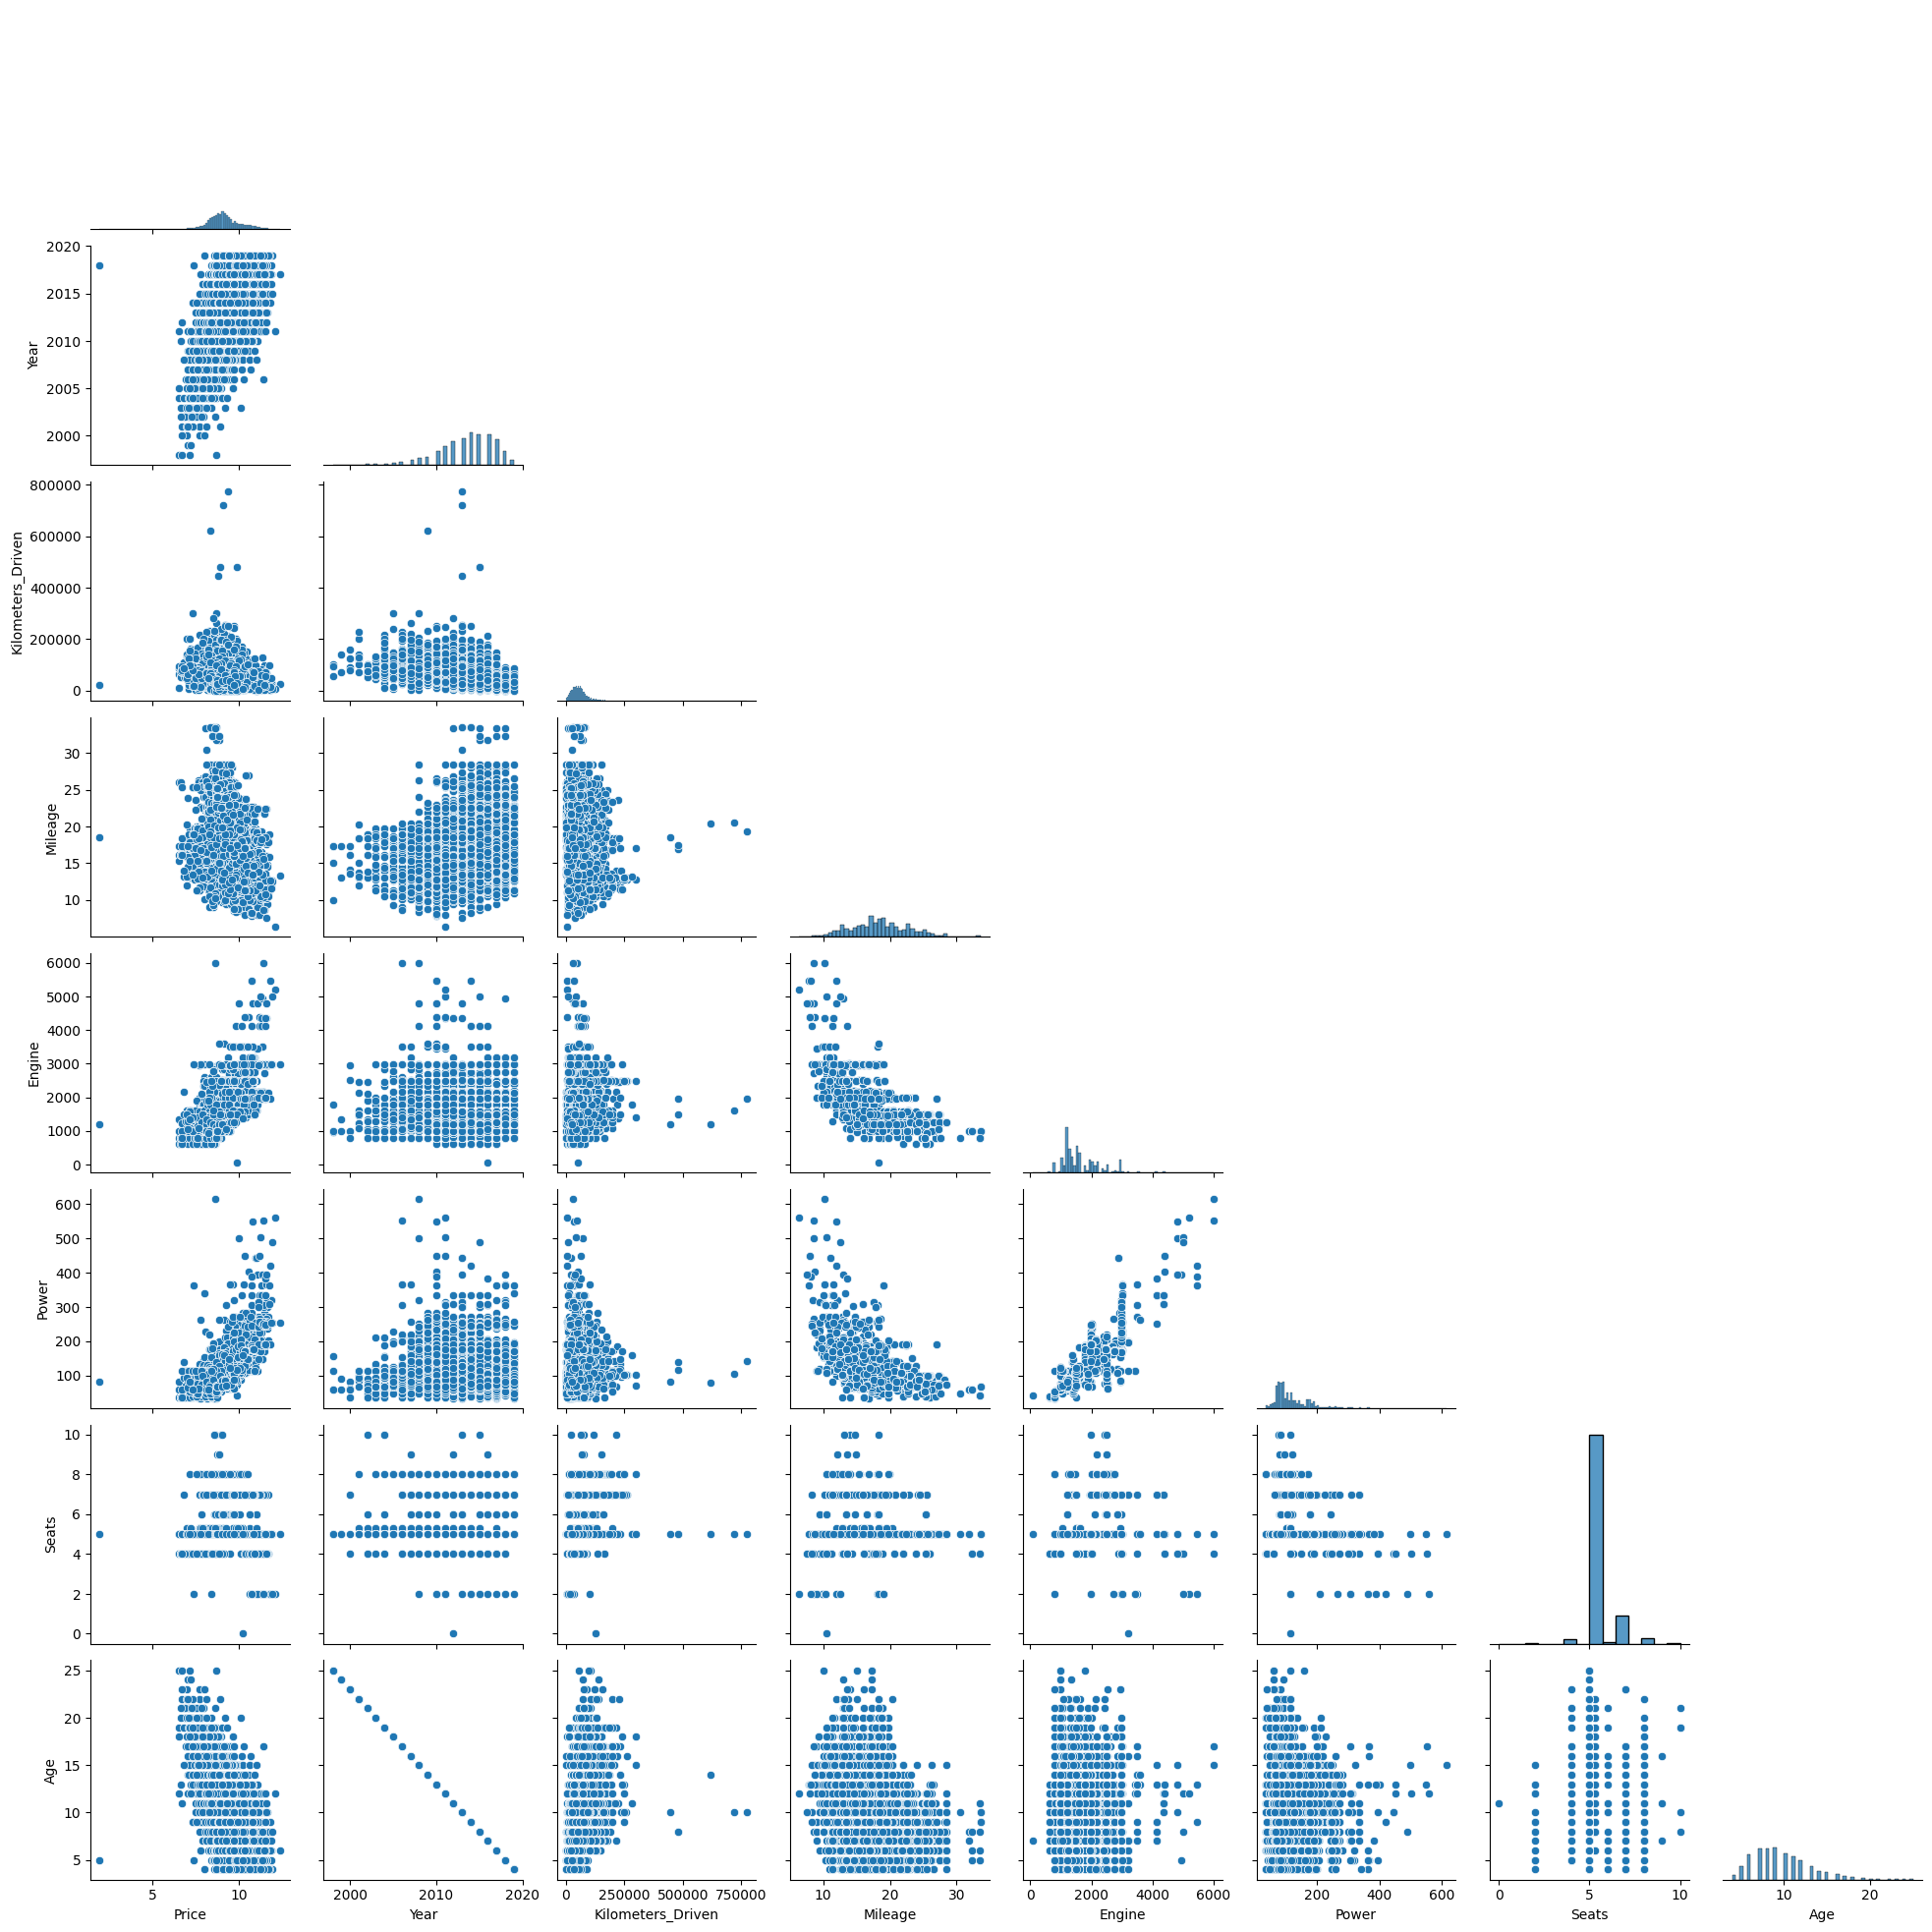

In [67]:
sns.pairplot(data = df_raw, corner = True)
plt.show()

In [68]:
df_raw.corr()

/var/folders/h5/kn1lz63d11q1v5psz9tm2w9h0000gn/T/ipykernel_19222/1768766406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.corr()


,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Age
Price,1.000000,0.499106,-0.191278,-0.291336,0.666831,0.732417,0.163335,-0.499106
Year,0.499106,1.000000,-0.454840,0.291874,-0.055507,0.010815,0.011054,-1.000000
Kilometers_Driven,-0.191278,-0.454840,1.000000,-0.141326,0.155316,0.002653,0.209924,0.454840
Mileage,-0.291336,0.291874,-0.141326,1.000000,-0.640402,-0.547909,-0.344731,-0.291874
Engine,0.666831,-0.055507,0.155316,-0.640402,1.000000,0.858462,0.392613,0.055507
Power,0.732417,0.010815,0.002653,-0.547909,0.858462,1.000000,0.097859,-0.010815
Seats,0.163335,0.011054,0.209924,-0.344731,0.392613,0.097859,1.000000,-0.011054
Age,-0.499106,-1.000000,0.454840,-0.291874,0.055507,-0.010815,-0.011054,1.000000


/var/folders/h5/kn1lz63d11q1v5psz9tm2w9h0000gn/T/ipykernel_19222/1515907964.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_raw.corr(),annot= True, cmap= "coolwarm")


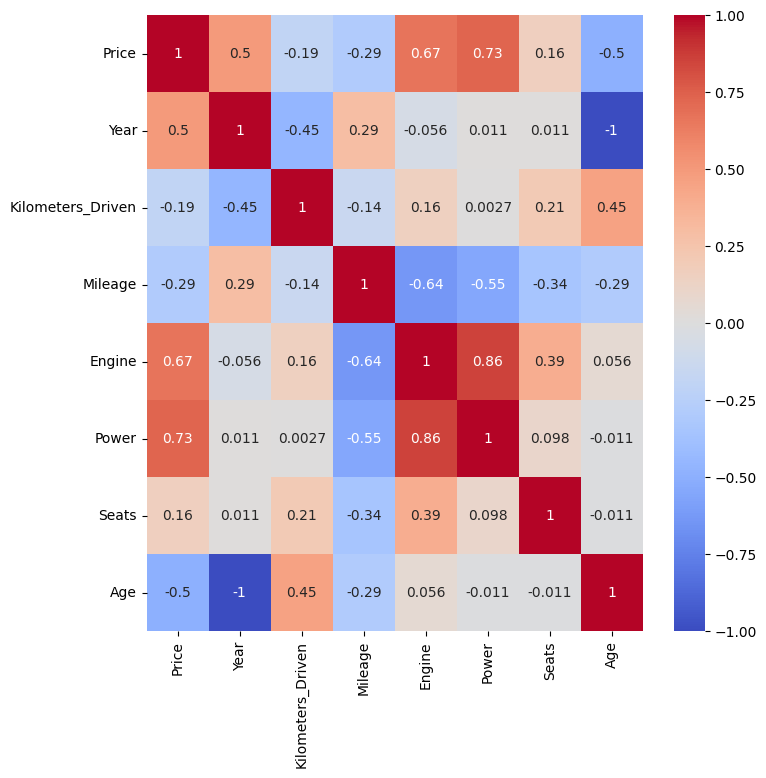

In [69]:
plt.figure(figsize = (8,8))
sns.heatmap(df_raw.corr(),annot= True, cmap= "coolwarm")
plt.show()

- 상관관계를 분석해보니 가격과 관련있는 변수는 ,Engine, Power가 가장 영향이 큰 것으로 보인다.

In [177]:
df_raw

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age,Brand
0,Mumbai,7.894572,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,13,Maruti
1,Pune,9.860684,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,8,Hyundai
2,Chennai,8.839033,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,12,Honda
3,Chennai,9.126715,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11,Maruti
4,Coimbatore,10.210778,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,10,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,9.289401,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7,Tata
7231,Kochi,9.508571,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,6,Ford
7232,Mumbai,10.234177,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,5,Jeep
7235,Kochi,9.692976,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,6,Maruti


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Nissan'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Volkswagen'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Land'),
  Text(9, 0, 'Mitsubishi'),
  Text(10, 0, 'Renault'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'Porsche'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Jaguar'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chevrolet'),
  Text(20, 0, 'Skoda'),
  Text(21, 0, 'Mini'),
  Text(22, 0, 'Fiat'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Smart'),
  Text(25, 0, 'Ambassador'),
  Text(26, 0, 'ISUZU'),
  Text(27, 0, 'Force'),
  Text(28, 0, 'Bentley'),
  Text(29, 0, 'Lamborghini')])

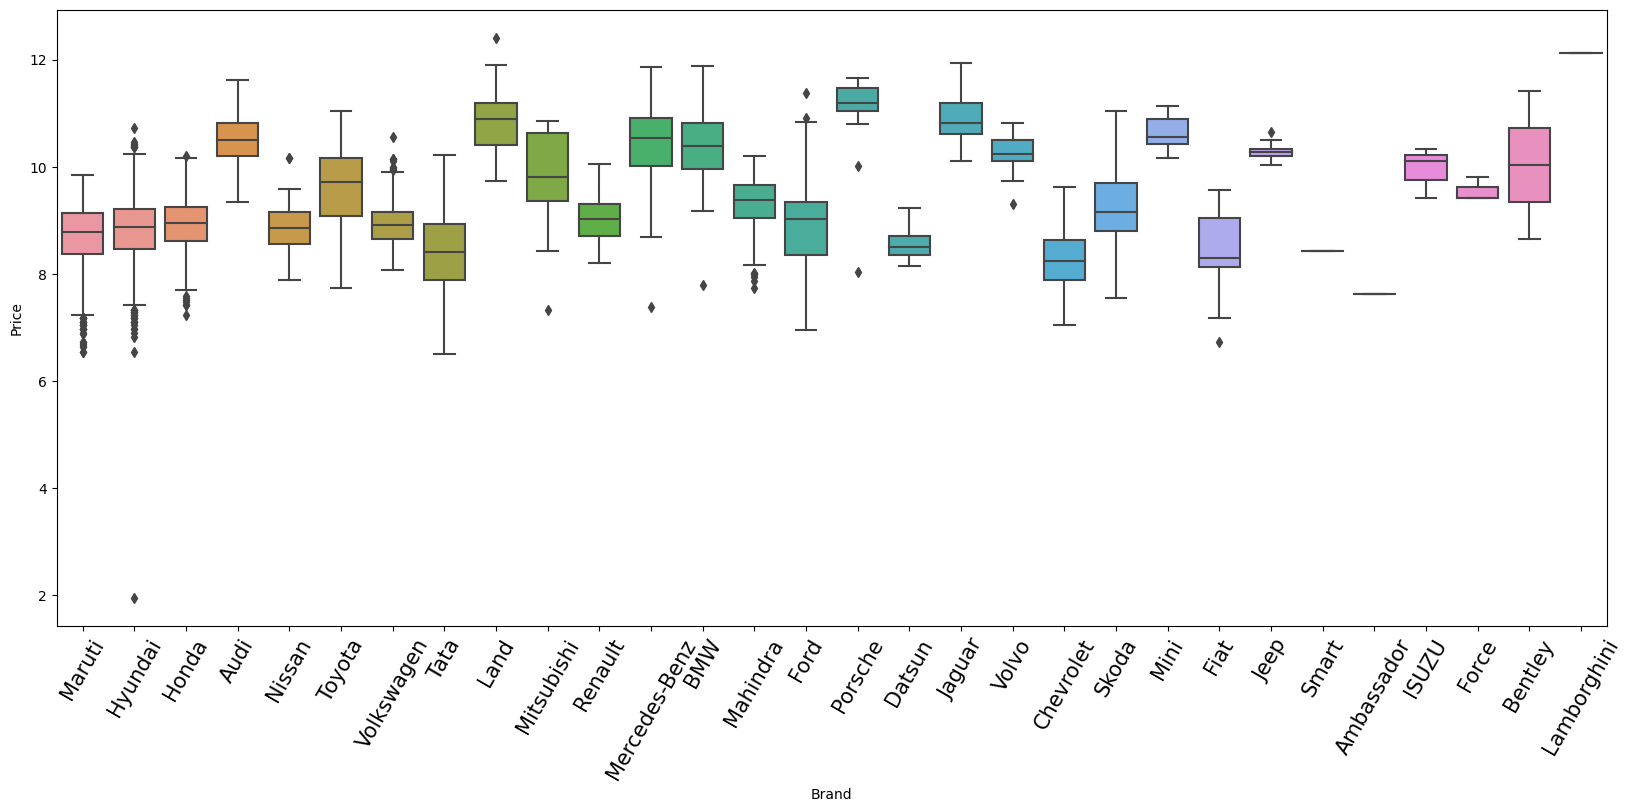

In [193]:
plt.figure(figsize = (20,8))
sns.boxplot(y = 'Price', x = 'Brand', data=df_raw)
plt.xticks(rotation=60, fontsize=15)


- 브랜드 별 가격차이가 있다는 것을 확인할 수 있다.

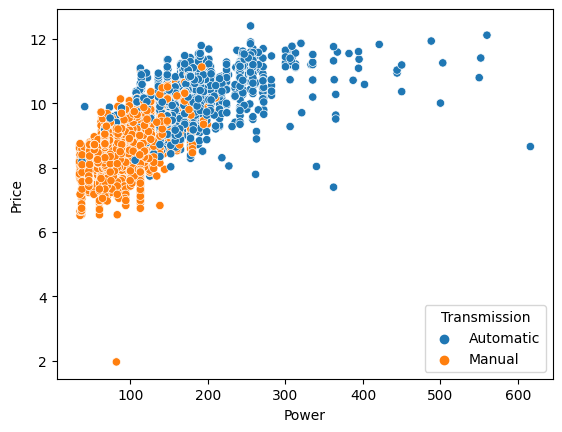

In [70]:
sns.scatterplot(x="Power",y="Price", hue = "Transmission",data= df_raw)
plt.show()

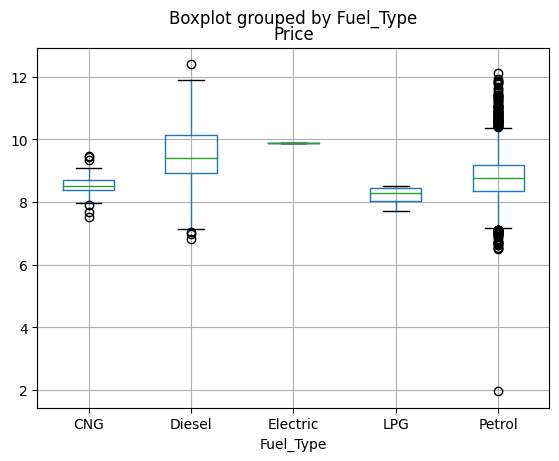

In [71]:
df_raw.boxplot(column = "Price", by = "Fuel_Type")
plt.show()

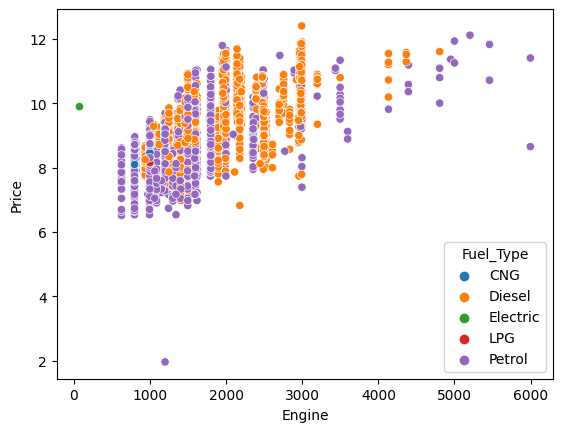

In [72]:
sns.scatterplot(x="Engine",y="Price", hue = "Fuel_Type",data= df_raw)
plt.show()

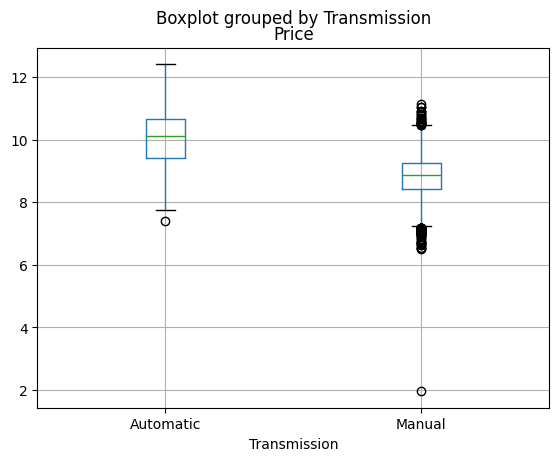

In [73]:
df_raw.boxplot(column = "Price", by = "Transmission")
plt.show()

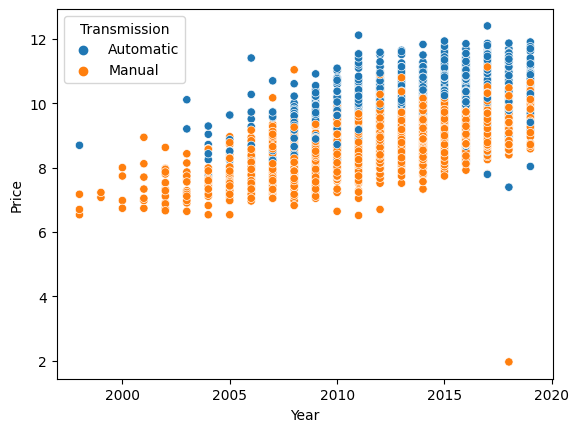

In [74]:
sns.scatterplot(x="Year",y="Price", hue = "Transmission",data= df_raw)
plt.show()

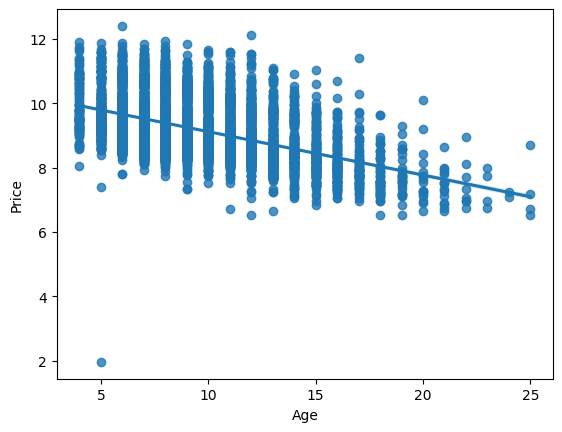

In [75]:
sns.regplot(x = "Age", y = "Price", data = df_raw)
plt.show()

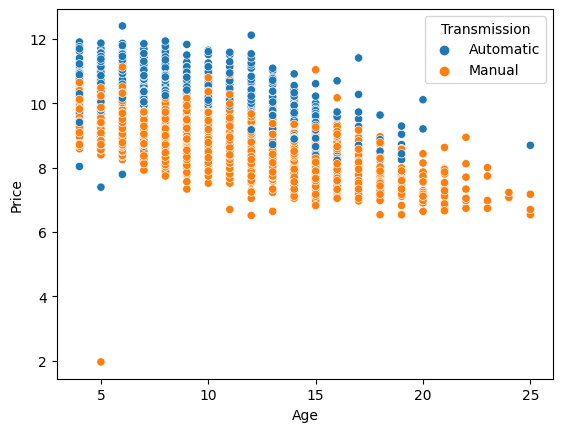

In [76]:
sns.scatterplot(x="Age",y="Price", hue = "Transmission",data= df_raw)
plt.show()

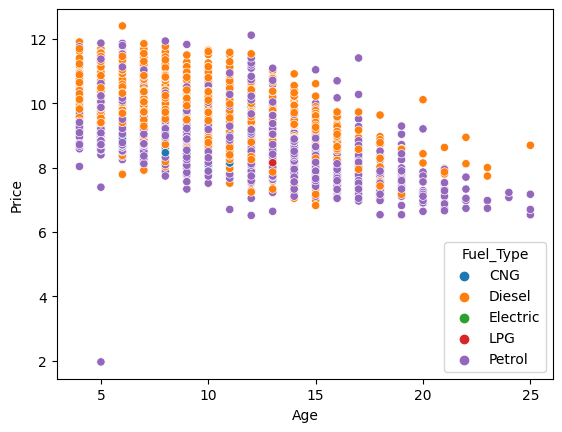

In [77]:
sns.scatterplot(x="Age",y="Price", hue = "Fuel_Type",data= df_raw)
plt.show()

<AxesSubplot: title={'center': 'the price of the year by the transmission'}, xlabel='Year', ylabel='Price'>

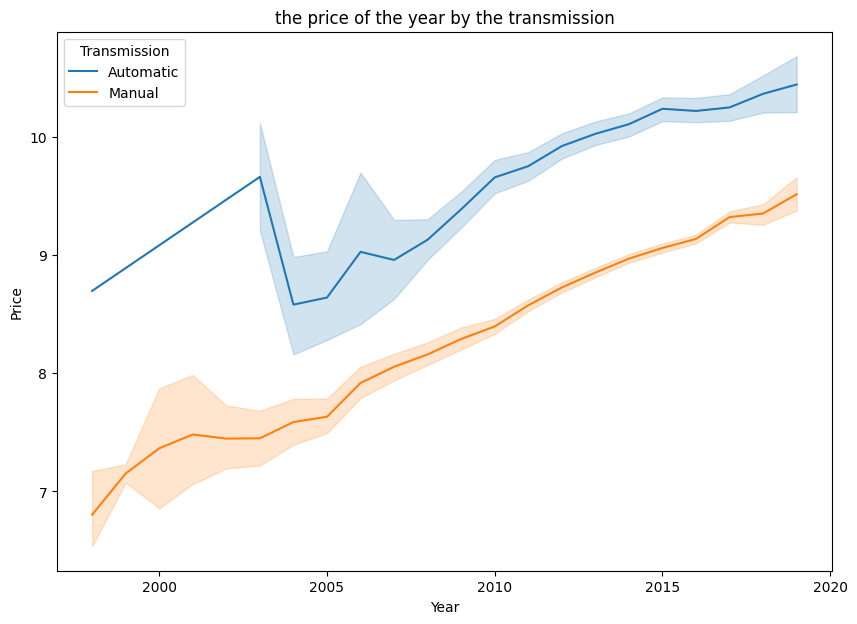

In [78]:
plt.figure(figsize=(10,7))
plt.title("the price of the year by the transmission")
sns.lineplot(x="Year",y="Price", hue = "Transmission",data= df_raw)

<AxesSubplot: title={'center': 'the price by Power'}, xlabel='Power', ylabel='Price'>

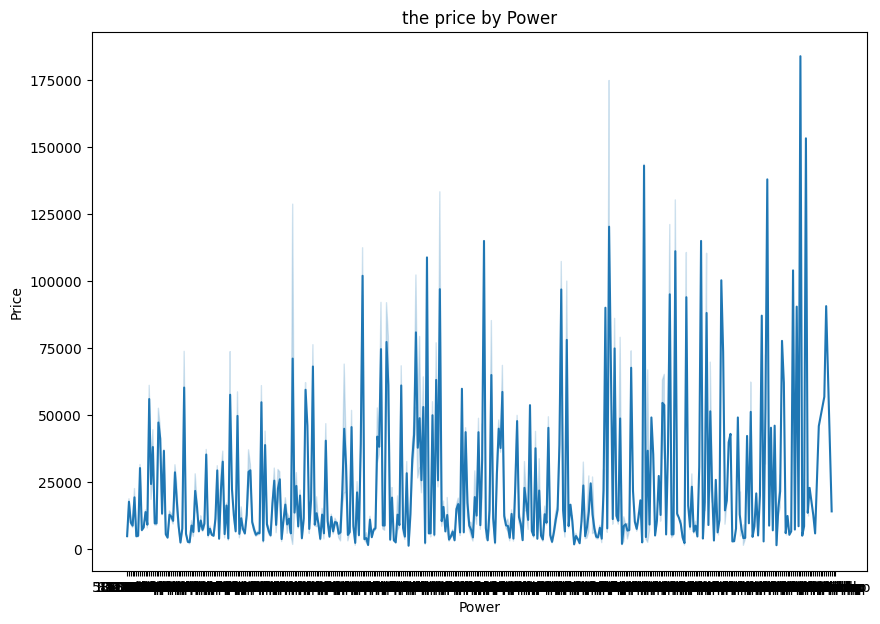

In [215]:
plt.figure(figsize=(10,7))
plt.title("the price by Power")
sns.lineplot(x="Power",y="Price",data= df_raw)

<AxesSubplot: title={'center': 'the price of the year by the Fuel_Type'}, xlabel='Year', ylabel='Price'>

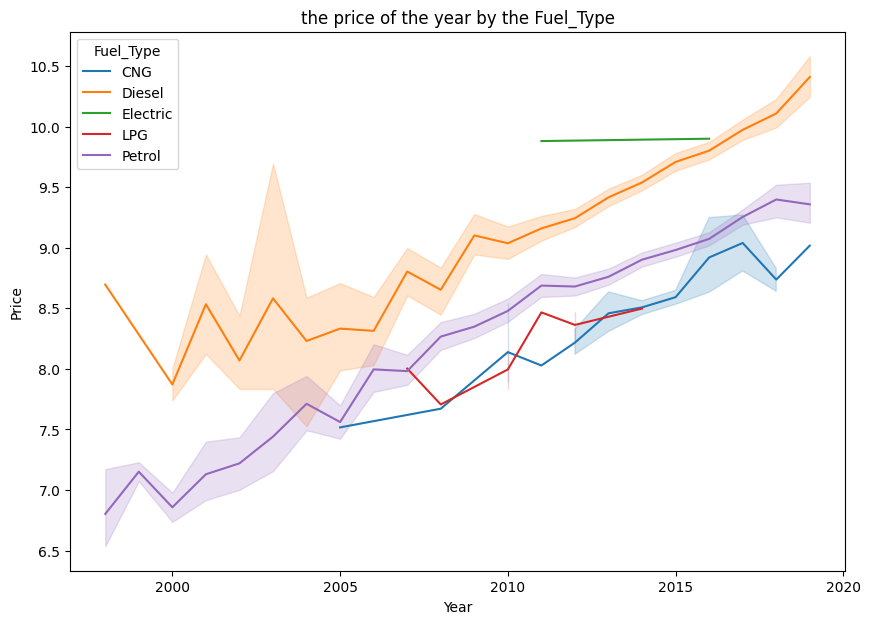

In [79]:
plt.figure(figsize=(10,7))
plt.title("the price of the year by the Fuel_Type")
sns.lineplot(x="Year",y="Price", hue = "Fuel_Type",data= df_raw)

<AxesSubplot: title={'center': 'the price of the year by the Owner_Type'}, xlabel='Year', ylabel='Price'>

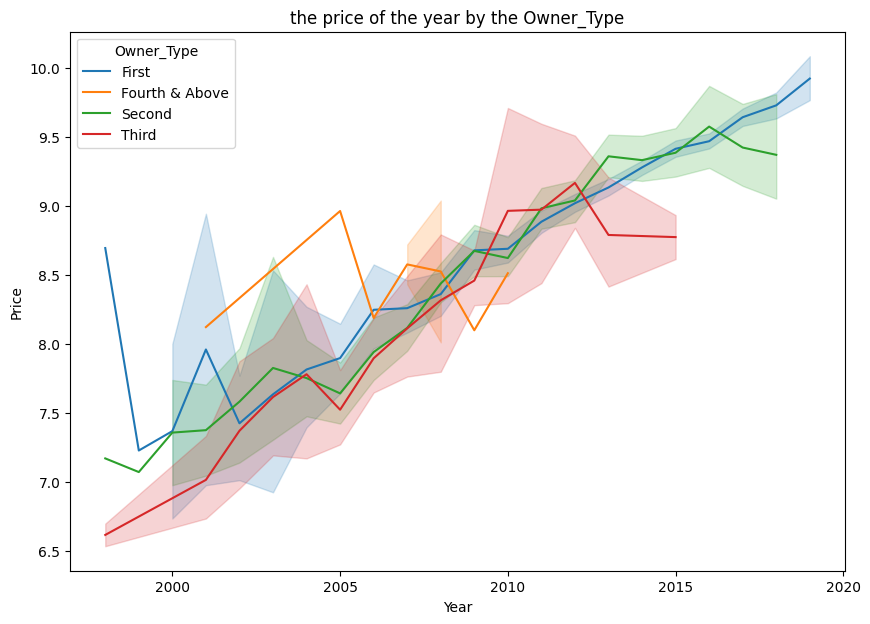

In [80]:
plt.figure(figsize=(10,7))
plt.title("the price of the year by the Owner_Type")
sns.lineplot(x="Year",y="Price", hue = "Owner_Type",data= df_raw)

### ANOVA 범주형 변수 대상으로진행

In [132]:
formula = "Price ~ Transmission + Fuel_Type + Owner_Type + Location + Brand"

lm = smf.ols(formula, df_raw).fit()

print(anova_lm(lm))

                  df       sum_sq      mean_sq            F         PR(>F)
Transmission     1.0  1801.945410  1801.945410  7588.438549   0.000000e+00
Fuel_Type        4.0   586.088635   146.522159   617.041111   0.000000e+00
Owner_Type       3.0   155.109458    51.703153   217.734786  3.048684e-134
Location        10.0   212.266126    21.226613    89.390525  5.661909e-173
Brand           29.0   637.865999    21.995379    92.627991   0.000000e+00
Residual      6151.0  1460.612239     0.237459          NaN            NaN


- 더미변수를 생성하여 범주형 자료를 처리한다.

In [82]:
df_dummy = pd.get_dummies(df_raw[["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"]])
df_dummy.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df_final = pd.concat([df_raw, df_dummy], axis = 1)
df_final = df_final.drop(["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"], axis = 1)
df_final

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Location_Ahmedabad,Location_Bangalore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,7.894572,2010,72000,26.60,998.0,58.16,5.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.860684,2015,41000,19.67,1582.0,126.20,5.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.839033,2011,46000,18.20,1199.0,88.70,5.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.126715,2012,87000,20.77,1248.0,88.76,7.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.210778,2013,40670,15.20,1968.0,140.80,5.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,9.289401,2016,41413,27.28,1047.0,69.00,5.0,7,0,0,...,0,0,0,0,0,0,1,0,0,0
7231,9.508571,2017,39015,17.00,1497.0,121.36,5.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
7232,10.234177,2018,6000,16.00,1368.0,160.00,5.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
7235,9.692976,2017,21380,24.30,1248.0,88.50,5.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0


# STEP 4. 모델 생성 

###  Linear Regression

* 데이터 구성

In [84]:
df_final.rename(columns = {df_final.columns[-12]:'Brand_Benz',df_final.columns[-33]:'Owner_FourthAbove'}, inplace = True)
df_final.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Location_Ahmedabad,Location_Bangalore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,7.894572,2010,72000,26.60,998.0,58.16,5.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.860684,2015,41000,19.67,1582.0,126.20,5.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.839033,2011,46000,18.20,1199.0,88.70,5.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.126715,2012,87000,20.77,1248.0,88.76,7.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.210778,2013,40670,15.20,1968.0,140.80,5.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df_final.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Location_Ahmedabad,Location_Bangalore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,7.894572,2010,72000,26.60,998.0,58.16,5.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.860684,2015,41000,19.67,1582.0,126.20,5.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.839033,2011,46000,18.20,1199.0,88.70,5.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.126715,2012,87000,20.77,1248.0,88.76,7.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.210778,2013,40670,15.20,1968.0,140.80,5.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


### 데이터 분할

In [104]:
df_x = df_final.drop(columns='Price', inplace= False)
df_y = df_final['Price'] 

In [116]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train_x data size : {}".format(df_train_x.shape))
print("train_y data size : {}".format(df_train_y.shape))
print("test_x data size : {}".format(df_test_x.shape))
print("test_y data size : {}".format(df_test_y.shape))

train_x data size : (4339, 59)
train_y data size : (4339,)
test_x data size : (1860, 59)
test_y data size : (1860,)


In [107]:
d_c = list(df_final.columns)
d_c

['Price',
 'Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Age',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_FourthAbove',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_Ambassador',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Bentley',
 'Brand_Chevrolet',
 'Brand_Datsun',
 'Brand_Fiat',
 'Brand_Force',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_ISUZU',
 'Brand_Jaguar',
 'Brand_Jeep',
 'Brand_Lamborghini',
 'Brand_Land',
 'Brand_Mahindra',
 'Brand_Maruti',
 'Brand_Benz',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Nissan',
 'Brand_Porsche',
 'Brand_Renault',
 'Brand_Skoda',
 'Brand_Smart

In [108]:
fo = [i + '+' for i in d_c[1:]]
form = ' '.join(fo)
formu = 'Price ~' + form
formula = formu[:-1]
formula

'Price ~Year+ Kilometers_Driven+ Mileage+ Engine+ Power+ Seats+ Age+ Location_Ahmedabad+ Location_Bangalore+ Location_Chennai+ Location_Coimbatore+ Location_Delhi+ Location_Hyderabad+ Location_Jaipur+ Location_Kochi+ Location_Kolkata+ Location_Mumbai+ Location_Pune+ Fuel_Type_CNG+ Fuel_Type_Diesel+ Fuel_Type_Electric+ Fuel_Type_LPG+ Fuel_Type_Petrol+ Transmission_Automatic+ Transmission_Manual+ Owner_Type_First+ Owner_FourthAbove+ Owner_Type_Second+ Owner_Type_Third+ Brand_Ambassador+ Brand_Audi+ Brand_BMW+ Brand_Bentley+ Brand_Chevrolet+ Brand_Datsun+ Brand_Fiat+ Brand_Force+ Brand_Ford+ Brand_Honda+ Brand_Hyundai+ Brand_ISUZU+ Brand_Jaguar+ Brand_Jeep+ Brand_Lamborghini+ Brand_Land+ Brand_Mahindra+ Brand_Maruti+ Brand_Benz+ Brand_Mini+ Brand_Mitsubishi+ Brand_Nissan+ Brand_Porsche+ Brand_Renault+ Brand_Skoda+ Brand_Smart+ Brand_Tata+ Brand_Toyota+ Brand_Volkswagen+ Brand_Volvo'

* 회귀 모델 생성 : 설명변수 전체

In [117]:
reg_model = smf.ols(formula, data = df_final)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1013.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        20:59:49   Log-Likelihood:                -982.65
No. Observations:                6199   AIC:                             2073.
Df Residuals:                    6145   BIC:                             2437.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.68

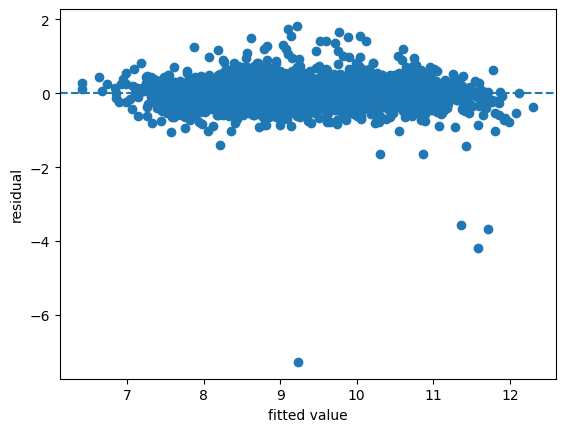

In [118]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value') ; plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

잔차의 독립성이 만족하지 않으니 회귀분석이 적합하지 않다고 판단함.

# STEP 4. 모델 생성 : Decision Tree

In [133]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

In [134]:
dt_model = DecisionTreeRegressor()
dt_model.fit(df_train_x,df_train_y)


DecisionTreeRegressor()

In [135]:
train_pred = dt_model.predict(df_train_x)
dt_model.score(df_train_x,df_train_y)

0.9999889666894057

In [136]:
test_pred = dt_model.predict(df_test_x)
dt_model.score(df_test_x,df_test_y)

0.8543259935022973

In [137]:
param_grid = {
    "max_depth": range(2, 10),
    "min_samples_split": range(2, 40, 2),
    "min_samples_leaf": range(2, 20, 2)
}

In [138]:
grid_dt = GridSearchCV(dt_model, param_grid, cv =3 , n_jobs = -1)
grid_dt.fit(df_train_x,df_train_y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [139]:
print("best model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_dt.score(df_test_x,df_test_y).round(3)))

best model: 
DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=24)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 24}

best score: 
0.841

best set score: 
0.873


In [140]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 6,min_samples_split = 24,max_depth = 9, random_state=1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=24,
                      random_state=1234)

In [141]:
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.900
Score on test set: 0.873


In [129]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = tree_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
4,Power,0.648
0,Year,0.224
3,Engine,0.043
6,Age,0.034
2,Mileage,0.010
1,Kilometers_Driven,0.006
47,Brand_Benz,0.005
24,Transmission_Manual,0.005
56,Brand_Toyota,0.004
45,Brand_Mahindra,0.003


변수별 중요도는 다음와 같다.

Text(0, 0.5, '변수')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-

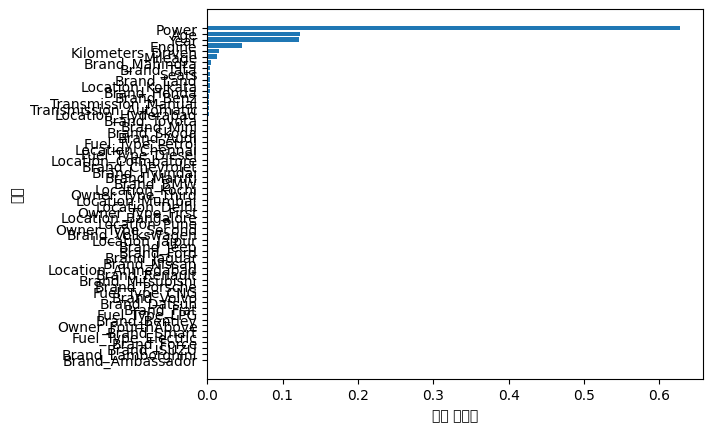

In [220]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

마찬가지로 power

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rf_model = RandomForestRegressor()
rf_model.fit (df_train_x, df_train_y)

RandomForestRegressor()

In [144]:
train_pred = rf_model.predict(df_train_x)
rf_model.score(df_train_x, df_train_y)

0.9851708531530023

In [145]:
test_pred = rf_model.predict(df_test_x)
rf_model.score(df_test_x, df_test_y)

0.918467946624208

* GridSearchCV를 이용한 최적 parameter/ model 찾기

In [146]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [147]:
grid_rf = GridSearchCV(rf_model, param_grid, cv=3, n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [148]:
print("best model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_rf.score(df_test_x,df_test_y).round(3)))

best model: 
RandomForestRegressor(max_depth=9, min_samples_leaf=2)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}

best score: 
0.881

best set score: 
0.907


* 최종모델

In [150]:
rf_final = RandomForestRegressor(min_samples_leaf = 2, min_samples_split = 2,
                                max_depth = 9, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=9, min_samples_leaf=2, random_state=1234)

In [151]:
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.937
Score on test set : 0.907


In [152]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = rf_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
4,Power,0.627
6,Age,0.124
0,Year,0.122
3,Engine,0.046
1,Kilometers_Driven,0.016
2,Mileage,0.013
45,Brand_Mahindra,0.005
55,Brand_Tata,0.004
5,Seats,0.004
44,Brand_Land,0.004


Text(0, 0.5, '변수')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-

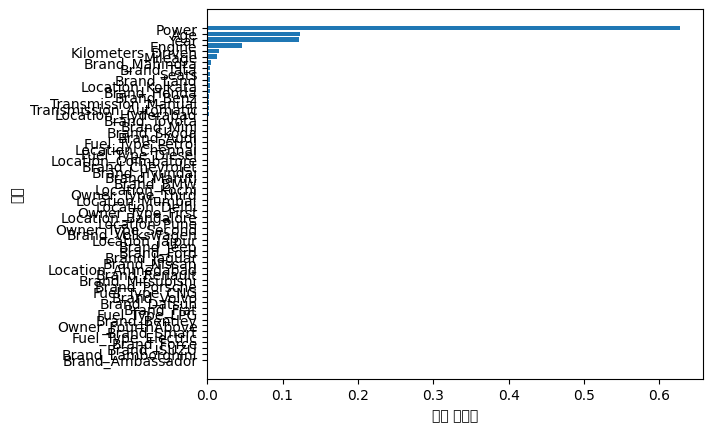

In [153]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그레디언트 부스팅

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

In [155]:
gb_model = GradientBoostingRegressor()
gb_model.fit (df_train_x, df_train_y)

GradientBoostingRegressor()

In [217]:
train_pred = gb_model.predict(df_train_x)
print(gb_model.score(df_train_x, df_train_y).round(3))
test_pred = gb_model.predict(df_test_x)
print(gb_model.score(df_test_x, df_test_y).round(3))

0.981
0.926


In [158]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [159]:
grid_gb = GridSearchCV(gb_model, param_grid, cv=3, n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [ ]:
print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_gb.score(df_test_x,df_test_y).round(3)))

best model: 
GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=34)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 34}

best score: 
0.92

best set score: 
0.896


In [160]:
gb_final = GradientBoostingRegressor(min_samples_leaf = 6, min_samples_split = 34,
                                max_depth = 9, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=34,
                          random_state=1234)

In [161]:
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.971
Score on test set : 0.928


In [162]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
4,Power,0.627
6,Age,0.124
0,Year,0.122
3,Engine,0.046
1,Kilometers_Driven,0.016
2,Mileage,0.013
45,Brand_Mahindra,0.005
55,Brand_Tata,0.004
5,Seats,0.004
44,Brand_Land,0.004


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-

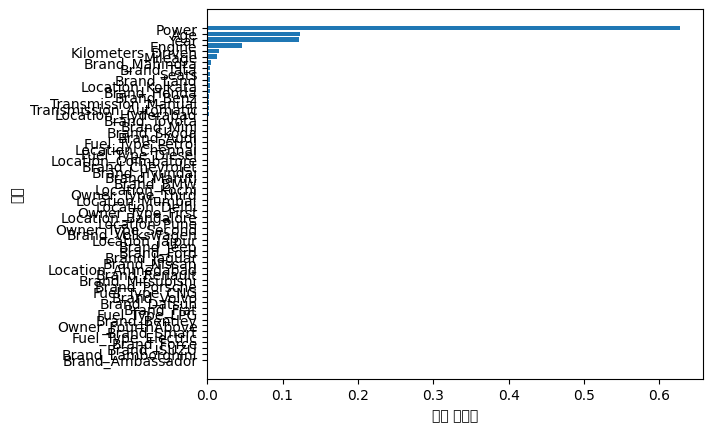

In [163]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

# STEP 6. 예측 모델 평가

In [196]:
# 평가함수 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
# from statsmodels.tools.eval_measures import rmse

In [197]:
# RMSE : root mean squared error 함수
def root_mean_squared_error (df_test_y, lr_y_pred):
    return np.sqrt(mean_squared_error(df_test_y, lr_y_pred))

In [198]:
# 목표변수, 설명변수 데이터 지정
df_tot_y = df_final["Price"]
df_tot_x = df_final.drop("Price", axis = 1, inplace = False)

In [199]:
# train_test_split( X : 설명변수 데이터, Y : 목표변수 데이터)
# test_size = test 데이버 비율, random_state : random seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_tot_x, df_tot_y,
                                                                test_size = 0.3, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_x.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (4339, 59)
train data Y size : (4339, 59)
test data X size : (1860, 59)
test data Y size : (1860, 59)


예측모델 생성

In [200]:
# 회귀 모델
lr_model = LinearRegression()
lr_model.fit(df_train_x, df_train_y)

LinearRegression()

In [201]:
LinearRegression()

LinearRegression()

In [202]:
# Decision Tree
dt_model = DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 16,
                                max_depth = 9, random_state = 1234)
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(min_samples_leaf = 6, min_samples_split = 8,
                                max_depth = 9, random_state = 1234)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(min_samples_leaf = 6, min_samples_split = 8,
                                max_depth = 9, random_state = 1234)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=8,
                          random_state=1234)

### 예측 및 평가 

In [203]:
# 모델 리스트, 그래프를 그리기 위한 생성 목적 
models = ["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

# 평가 리스트 초기화 
mse, rmse, mae, mape = [], [], [], []

In [204]:

# 1) Regrssion 

# 예측
lr_y_pred = lr_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [205]:
# 2) Decision Tree

# 예측
df_y_pred = dt_model.predict(df_test_x)

# 평가 
mse.append(mean_squared_error(df_test_y, df_y_pred))
rmse.append(root_mean_squared_error(df_test_y, df_y_pred))
mae.append(mean_absolute_error(df_test_y, df_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, df_y_pred))

In [206]:
# 3) Random Forest

# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [207]:
# 4) Gradient Boosting

# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

- 예측 모델 별 성과 측정

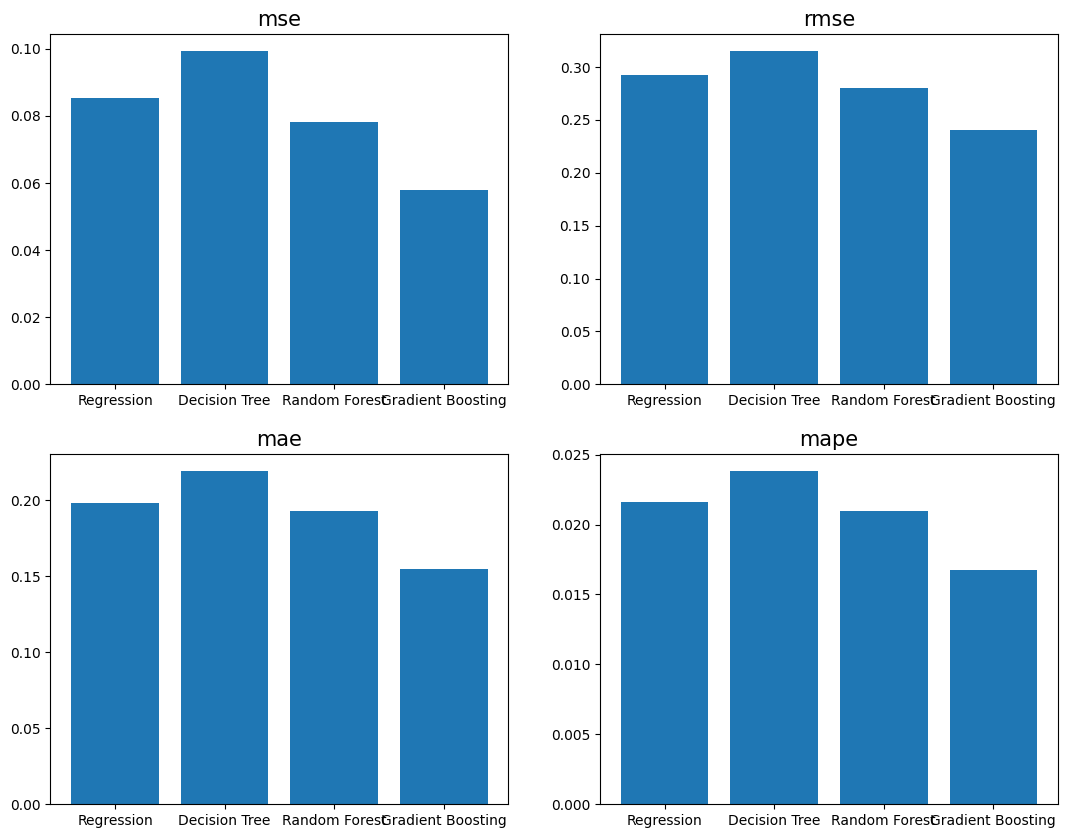

In [208]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)